# Functions

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def univariate_analysis_numerical(df, column_name):
    # Check if the column is numerical
    if df[column_name].dtype in ['int64', 'float64']:
        # Plot histogram
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 3, 1)
        sns.histplot(df[column_name], kde=True)
        plt.title('Histogram')

        # Plot boxplot
        plt.subplot(1, 3, 2)
        plt.boxplot(df[column_name],patch_artist=True, notch=True)
        # Detect those values that are extreme outliers, more than 3 times the IQR
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        # Add one to the column named ext_univar_outlier
        outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)
        df.loc[outliers, 'ext_univar_outlier'] += 1

        # check if any outliers are over the upper bound
        if df[column_name].max() > upper_bound:
            plt.axhline(y=upper_bound, color='r', linestyle='--', linewidth=1)
        if df[column_name].min() < lower_bound:
            plt.axhline(y=lower_bound, color='r', linestyle='--', linewidth=1)


        plt.show()
        return df

    else:
        print("The specified column is not numerical.")
        return df
    
def univariate_analysis_categorical(df, column_name):
    # Check if the column is categorical
    if df[column_name].dtype == 'object':
        # Plot bar chart
        if column_name == 'differentiate':
            # change the names
            df[column_name] = df[column_name].replace({"Well differentiated": 'well diff', "Moderately differentiated": 'mod diff', 
                                                       "Poorly differentiated": 'poor diff', "Undifferentiated": 'undiff'})
            # plot the graph following the order
            plt.figure()
            sns.countplot(x=df[column_name], order=['well diff', 'mod diff', 'poor diff', 'undiff'])
            plt.title('Bar Chart')

        elif column_name == '6th Stage':
            plt.figure()
            sns.countplot(x=df[column_name], order=['IIA','IIB','IIIA','IIIB','IIIC'])
            plt.title('Bar Chart')
            
        else:
            plt.figure()
            sns.countplot(x=df[column_name])
            plt.title('Bar Chart')
       

    else:
        print("The specified column is not categorical.")

def bivariate_numerical(df):
    target_variable = 'Status'
    num_vars = df.select_dtypes(include=['int64', 'float64']).columns
    
    sns.pairplot(df[num_vars], hue='Status')
    
    df_melted = df.melt(id_vars=target_variable, value_vars=num_vars)

    # Create a box plot categorized by the categorical variable on the y-axis
    sns.catplot(x='variable', y='value', hue=target_variable, kind='box', data=df_melted, height=6, aspect=2)

    # Rotate x-axis labels for better readability if needed
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()

def bivariate_categorical(df):
    target_variable = 'Status'
    cat_vars = df.select_dtypes(include=['object']).columns
    num_categorical_vars = len(cat_vars)
    num_rows = (num_categorical_vars + 3) // 4  # Ceiling division to ensure at least 1 row
    num_cols = min(num_categorical_vars, 4)

    # Set up the figure
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

    # Flatten the axes array for easy iteration
    axes_flat = axes.flatten()

    # Loop over categorical variables
    for i, cat_var in enumerate(cat_vars):
        # Calculate the position in the subplot grid
        row = i // 4
        col = i % 4
        
        # Create countplot
        sns.countplot(x=cat_var, hue=target_variable, data=df, ax=axes[row, col])
        axes[row, col].set_title(f'{cat_var} vs {target_variable}')
        axes[row, col].set_xlabel(cat_var)
        axes[row, col].set_ylabel('Count')

    # Hide unused subplots if necessary
    for i in range(num_categorical_vars, num_rows*num_cols):
        row = i // 4
        col = i % 4
        fig.delaxes(axes[row, col])

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()



# Importing the Dataset

c:\Users\JaIk194\Documents\Master\Q2\ML\Project\BreastCancerClassification


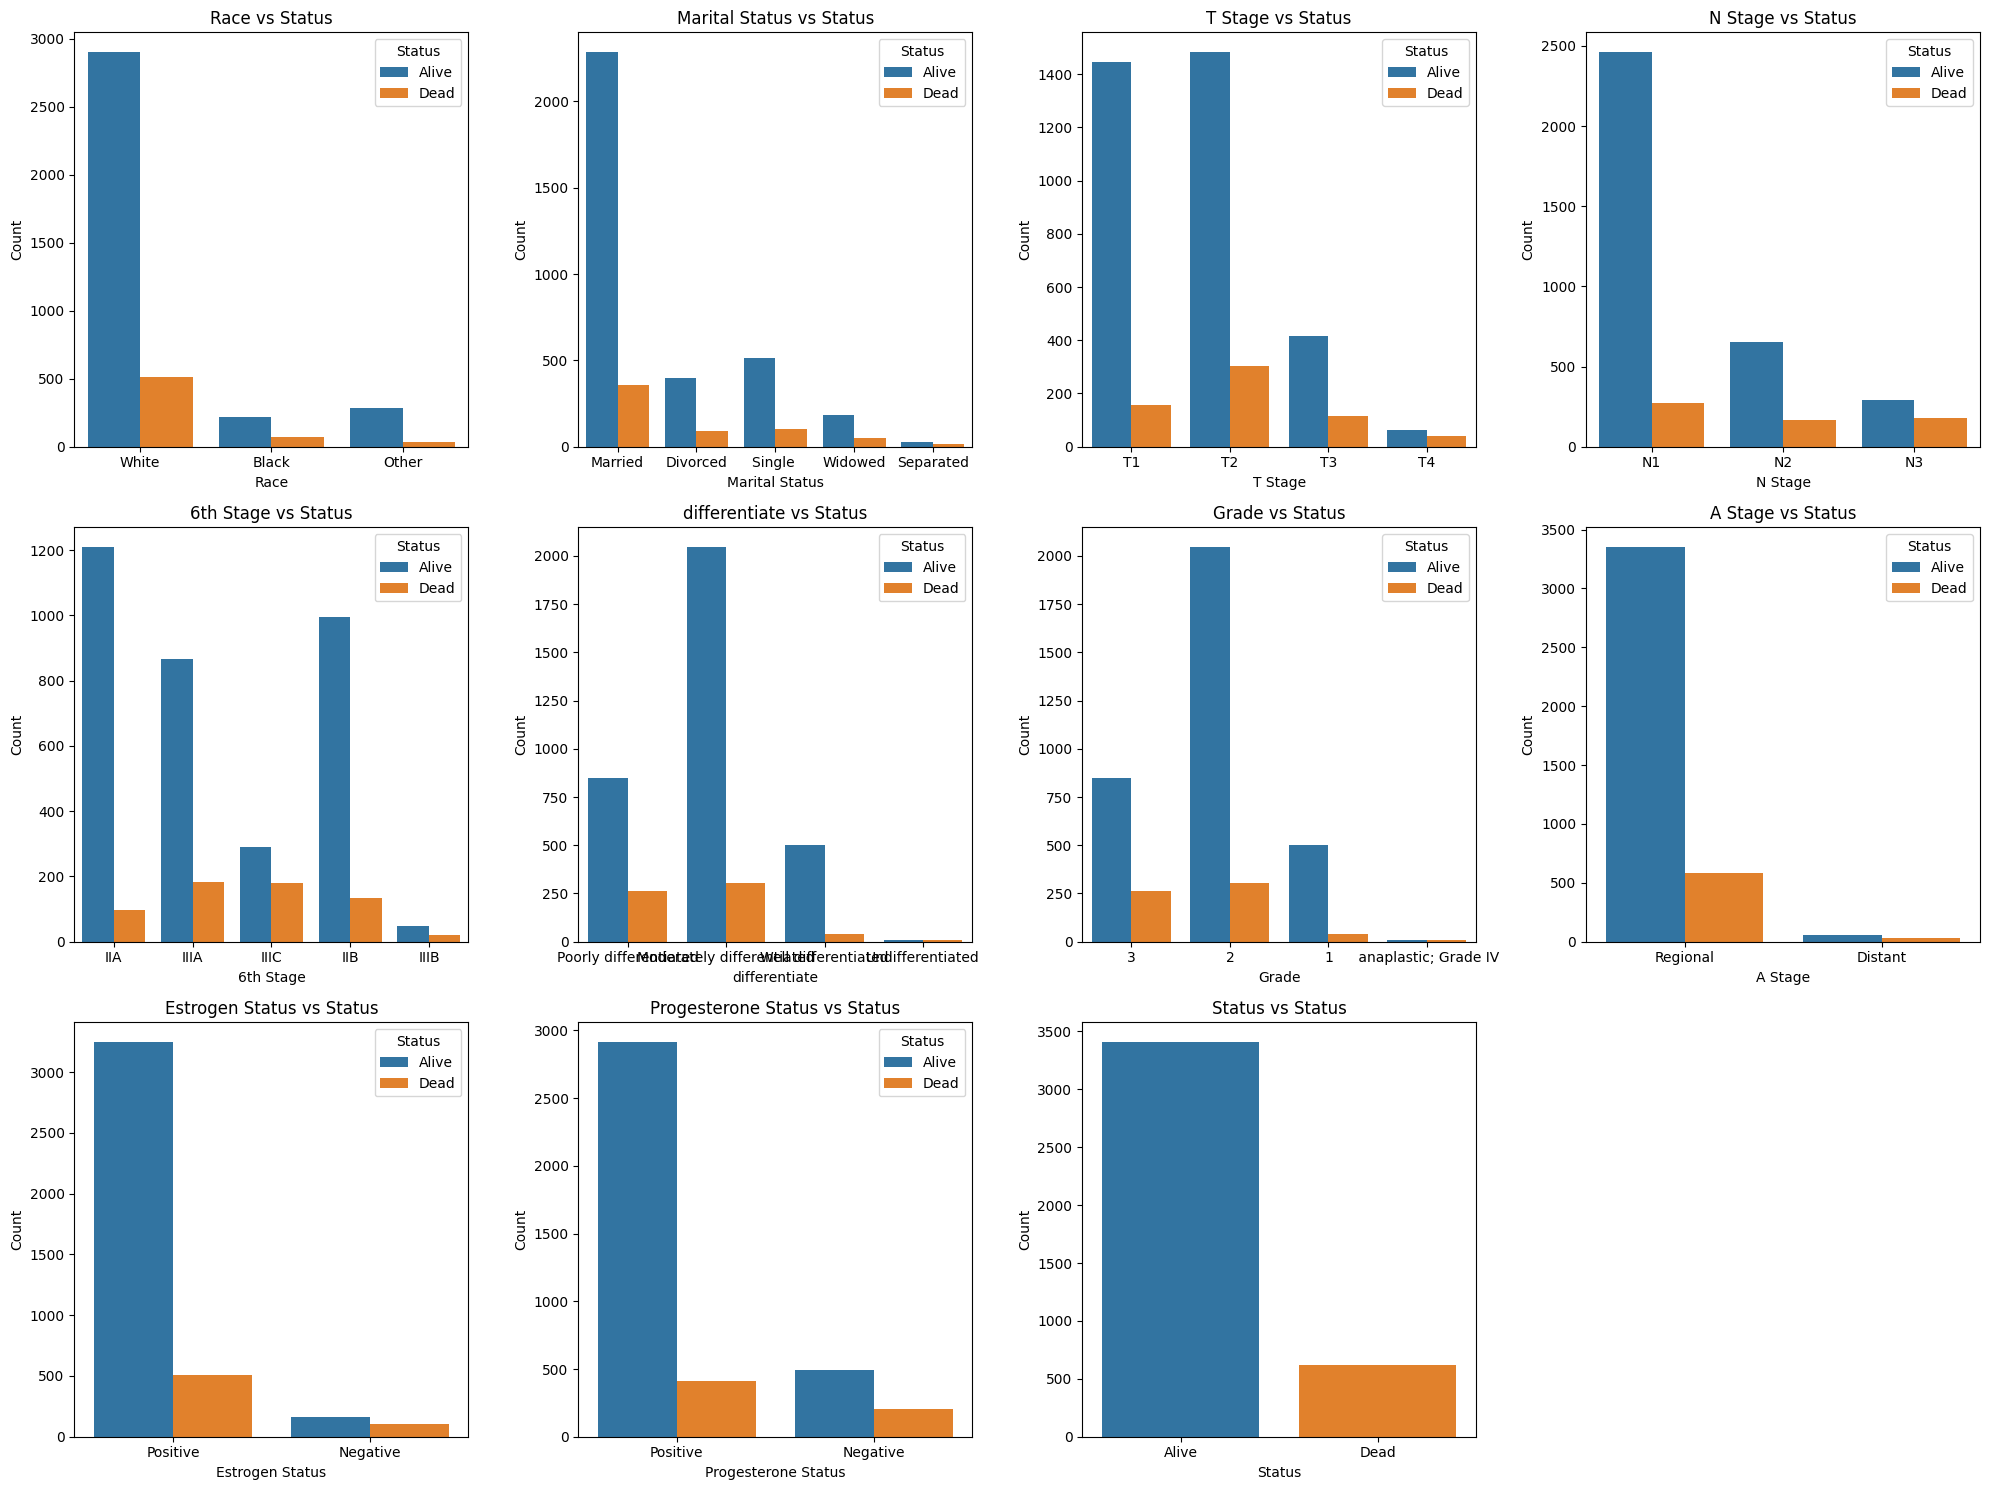

In [32]:
import pandas as pd
import os
#parent_directory = os.path.dirname(os.getcwd())
#os.chdir('BreastCancerClassification')
print(os.getcwd())
#EDA on numerical variables
# Load the dataset

df_breast_cancer = pd.read_csv('data/Breast_Cancer.csv', 
                               sep=",", header=0)
'''df_breast_cancer["ext_univar_outlier"] = 0

for column in df_breast_cancer.columns:
    if column not in ['ext_univar_outlier']:
        #df_breast_cancer = univariate_analysis_numerical(df_breast_cancer, column)
        univariate_analysis_categorical(df_breast_cancer, column)
df_breast_cancer.to_csv('data/Breast_Cancer_outliers.csv', index=False)'''
#bivariate_numerical(df_breast_cancer[['Age', 'Tumor Size', 'Regional Node Examined', 'Regional Node Positive','Survival Months','Status']])
bivariate_categorical(df_breast_cancer)
